In [52]:
import pandas as pd

import numpy as np
# import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from scipy import stats
import os

os.chdir("Z:\Shared\Amichai\All")


In [53]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "n.s."

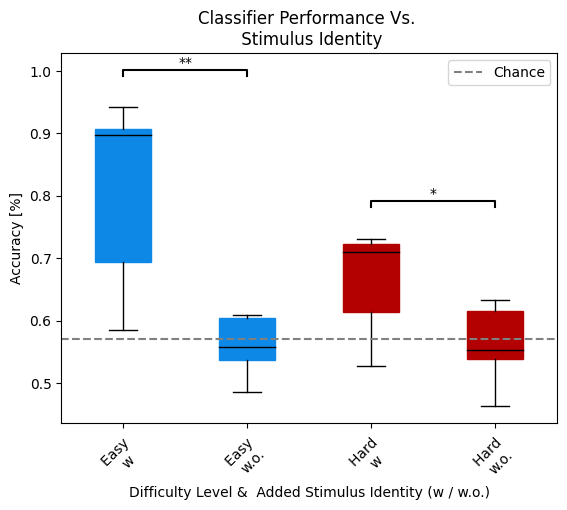

In [57]:
c_easy = "#0d88e6"
c_hard = "#b30000"

data = pd.read_csv("results_h_e_division.csv")

easy_w = data.loc[(data['Level'] == 'e') & (data['Cue added?'] == True) & (data['Previous Cue'] == False)]['Test_acc']
easy_wo = data.loc[(data['Level'] == 'e') & (data['Cue added?'] == False) & (data['Previous Cue'] == False)]['Test_acc']

hard_w = data.loc[(data['Level'] == 'h') & (data['Cue added?'] == True) & (data['Previous Cue'] == False)]['Test_acc']
hard_wo = data.loc[(data['Level'] == 'h') & (data['Cue added?'] == False) & (data['Previous Cue'] == False)]['Test_acc']

# One side t-test
stat, pvalue = stats.ttest_ind(easy_w, easy_wo, alternative='greater')
e_astr = convert_pvalue_to_asterisks(pvalue)
stat, pvalue = stats.ttest_ind(hard_w, hard_wo, alternative='greater')
h_astr = convert_pvalue_to_asterisks(pvalue)




fig, ax = plt.subplots()
fig.canvas.draw()
x = [1, 2, 3, 4]
ticks = ['Easy \nw', 'Easy \nw.o.', 'Hard \nw', 'Hard \nw.o.']

bplot = ax.boxplot([easy_w, easy_wo, hard_w, hard_wo], vert=True, labels=ticks, patch_artist=True)
plt.xticks(rotation=45)

bplot['boxes'][0].set_color(c_easy)
bplot['boxes'][1].set_color(c_easy)
bplot['boxes'][2].set_color(c_hard)
bplot['boxes'][3].set_color(c_hard)
for median in bplot['medians']:
    median.set_color('black')

# statistical annotation
x1, x2 = 1, 2  # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = easy_w.max() + 0.05, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
plt.text((x1 + x2) * .5, y + h, e_astr, ha='center', va='bottom', color=col)

x1, x2 = 3, 4  # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = hard_w.max() + 0.05, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
plt.text((x1 + x2) * .5, y + h, h_astr, ha='center', va='bottom', color=col)

plt.hlines(np.mean(data["Lick Bias"])/100, 0.5, 4.5, colors="gray", ls="--", label="Chance")
plt.title("Classifier Performance Vs. \n Stimulus Identity")
plt.legend()
plt.xlabel("Difficulty Level &  Added Stimulus Identity (w / w.o.)")
plt.ylabel("Accuracy [%]")
plt.savefig("fig1.png", bbox_inches="tight", pad_inches=0.2)
plt.show()


In [59]:
data.loc[(data['Level'] == 'e')][]
# stats.ttest_ind(easy_w,chance, alternative='greater')

0.8976430976430978

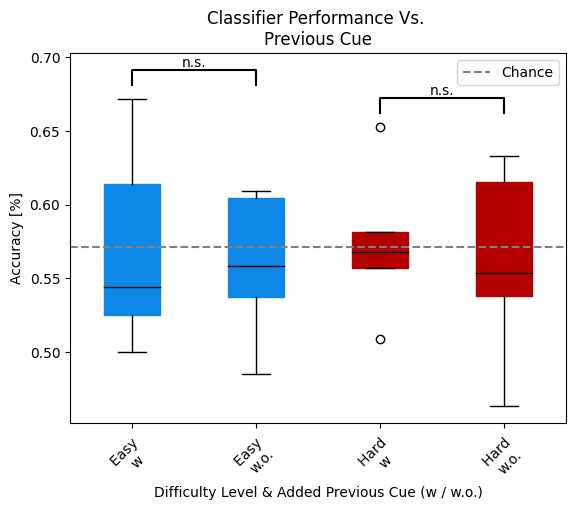

In [56]:


prev_e_w = data.loc[(data['Level'] == 'e') & (data['Previous Cue'] == True) & (data['Cue added?'] == False)]['Test_acc']
prev_e_wo = data.loc[(data['Level'] == 'e') & (data['Previous Cue'] == False) & (data['Cue added?'] == False)][
    'Test_acc']

prev_h_w = data.loc[(data['Level'] == 'h') & (data['Previous Cue'] == True) & (data['Cue added?'] == False)]['Test_acc']
prev_h_wo = data.loc[(data['Level'] == 'h') & (data['Previous Cue'] == False) & (data['Cue added?'] == False)][
    'Test_acc']

# 2 side t-test
stat, pvalue = stats.ttest_ind(prev_e_w, prev_e_wo, alternative='greater')
e_astr = convert_pvalue_to_asterisks(pvalue)

stat, pvalue = stats.ttest_ind(prev_h_w, hard_wo, alternative='greater')
h_astr = convert_pvalue_to_asterisks(pvalue)

x = [1, 2, 3, 4]

ticks = ['Easy \nw', 'Easy \nw.o.', 'Hard \nw', 'Hard \nw.o.']

fig, ax = plt.subplots()

# We need to draw the canvas, otherwise the labels won't be positioned and
# won't have values yet.
fig.canvas.draw()

bplot = ax.boxplot([prev_e_w, prev_e_wo, prev_h_w, prev_h_wo], vert=True, labels=ticks, patch_artist=True)
plt.xticks(rotation=45)

bplot['boxes'][0].set_color(c_easy)
bplot['boxes'][1].set_color(c_easy)
bplot['boxes'][2].set_color(c_hard)
bplot['boxes'][3].set_color(c_hard)
for median in bplot['medians']:
    median.set_color('black')

# statistical annotation
x1, x2 = 1, 2  # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = np.maximum(prev_e_w.max(), prev_e_wo.max()) + 0.01, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
plt.text((x1 + x2) * .5, y + h, e_astr, ha='center', va='bottom', color=col)

x1, x2 = 3, 4  # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = np.maximum(prev_h_w.max(), prev_h_wo.max()) + 0.01, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
plt.text((x1 + x2) * .5, y + h, h_astr, ha='center', va='bottom', color=col)

plt.hlines(np.mean(data["Lick Bias"])/100, 0.5, 4.5, colors="gray", ls="--", label="Chance")
plt.title("Classifier Performance Vs. \nPrevious Cue")
plt.legend()
plt.xlabel("Difficulty Level & Added Previous Cue (w / w.o.)")
plt.ylabel("Accuracy [%]")
plt.savefig("fig2.png", bbox_inches="tight", pad_inches=0.2)
plt.show()
